####  Question No:1  (10 marks)
Build a Convolution Neural Network to classify 6 classes of chess game images.
Dataset_Folder Name: Chess

Conditions to consider:

- Parameters should not cross 300000

- Should not use more than 4 layers (except input and output, including convolution and dense layers)

- Use Adam Optimizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image # library to read jpeg images
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random
from tensorflow.keras import optimizers


from keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import  load_img

In [ ]:
train_dir="/content/drive/MyDrive/colabdataset/Chess/Train"
test_dir="/content/drive/MyDrive/colabdataset/Chess/Test"

Reading the image data and scaling

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 319 images belonging to 6 classes.
Found 82 images belonging to 6 classes.


In [ ]:
print("Training Set Shape:", training_set.image_shape)

Training Set Shape: (64, 64, 3)


In [ ]:
print("Testing Set Shape:", test_set.image_shape)

Testing Set Shape: (64, 64, 3)


In [ ]:
training_set.class_indices

{'Bishop': 0, 'King': 1, 'Knight': 2, 'Pawn': 3, 'Queen': 4, 'Rook': 5}

In [ ]:
class_names = list(training_set.class_indices.keys())
print("training Class Names:", class_names)

training Class Names: ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


In [ ]:
print("testing class names:",list(test_set.class_indices.keys()))

testing class names: ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


To display the images of different class in chess dataset

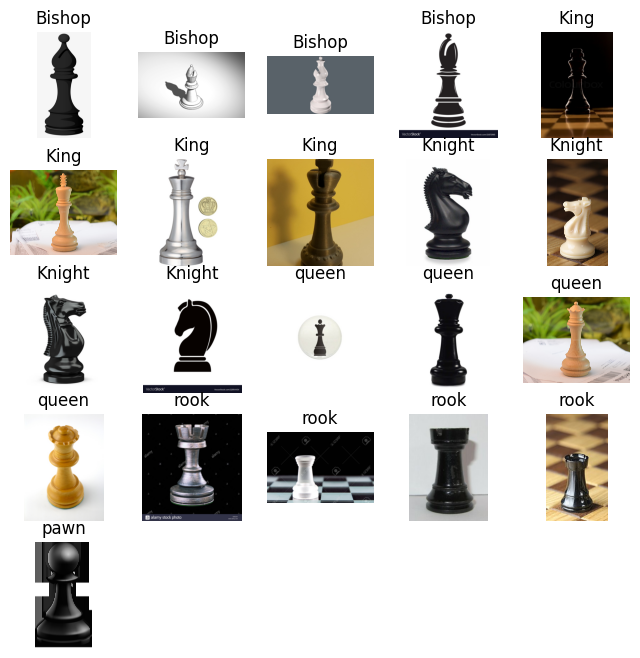

In [ ]:
bishop_dir ="/content/drive/MyDrive/colabdataset/Chess/Train/Bishop"
king_dir="/content/drive/MyDrive/colabdataset/Chess/Train/King"
knight_dir="/content/drive/MyDrive/colabdataset/Chess/Train/Knight"
pawn_dir="/content/drive/MyDrive/colabdataset/Chess/Train/Pawn"
queen_dir="/content/drive/MyDrive/colabdataset/Chess/Train/Queen"
rook_dir="/content/drive/MyDrive/colabdataset/Chess/Train/Rook"

# Get the list of file names in the directories
bishop_filenames = os.listdir(bishop_dir)
king_filenames = os.listdir(king_dir)
kinght_filenames = os.listdir(knight_dir)
pawn_filenames = os.listdir(pawn_dir)
queen_filenames = os.listdir(queen_dir)
rook_filenames = os.listdir(rook_dir)

# Create lists of image file paths to display
bishop_images = [os.path.join(bishop_dir, fname) for fname in bishop_filenames[0:4]]
king_images = [os.path.join(king_dir, fname) for fname in king_filenames[0:4]]
knight_images = [os.path.join(knight_dir, fname) for fname in kinght_filenames[0:4]]
pawn_images = [os.path.join(pawn_dir, fname) for fname in pawn_filenames[0:4]]
queen_images = [os.path.join(queen_dir, fname) for fname in queen_filenames[0:4]]
rook_images = [os.path.join(rook_dir, fname) for fname in rook_filenames[0:4]]

# Create a 4x4 grid to display images
plt.figure(figsize=(8, 8))

# Display bishop images
for i, bishop_image_path in enumerate(bishop_images):
    subplot = plt.subplot(5, 5, i +1)
    subplot.axis('off')
    img = Image.open(bishop_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('Bishop')
  # Display king  images
for i, king_image_path in enumerate(king_images):
    subplot = plt.subplot(5, 5, i + 5)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(king_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('King')
#Knight images
for i, knight_image_path in enumerate(knight_images):
    subplot = plt.subplot(5, 5, i + 9)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(knight_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('Knight')
#queen images
for i, queen_image_path in enumerate(queen_images):
    subplot = plt.subplot(5, 5, i + 13)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(queen_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('queen')
#rook images
for i, rook_image_path in enumerate(rook_images):
    subplot = plt.subplot(5, 5, i + 17)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(rook_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('rook')
#pawn images
for i, pawn_image_path in enumerate(pawn_images):
    subplot = plt.subplot(5, 5, i + 21)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(pawn_image_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB format
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.title('pawn')


plt.show()



Gray scale image

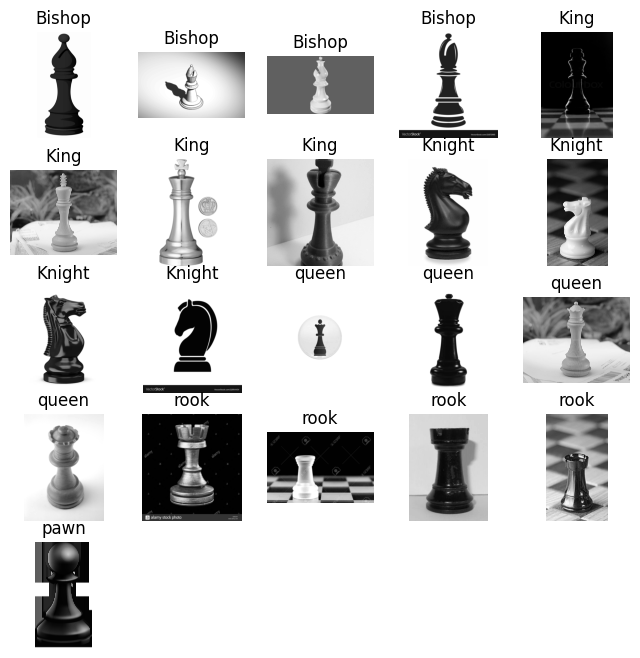

In [ ]:
# Create a 4x4 grid to display images
plt.figure(figsize=(8, 8))

# Display bishop images
for i, bishop_image_path in enumerate(bishop_images):
    subplot = plt.subplot(5, 5, i +1)
    subplot.axis('off')
    img = Image.open(bishop_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('Bishop')

  # Display king  images
for i, king_image_path in enumerate(king_images):
    subplot = plt.subplot(5, 5, i + 5)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(king_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('King')

#Knight images
for i, knight_image_path in enumerate(knight_images):
    subplot = plt.subplot(5, 5, i + 9)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(knight_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('Knight')
#queen images
for i, queen_image_path in enumerate(queen_images):
    subplot = plt.subplot(5, 5, i + 13)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(queen_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('queen')
#rook images
for i, rook_image_path in enumerate(rook_images):
    subplot = plt.subplot(5, 5, i + 17)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(rook_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('rook')
#pawn images
for i, pawn_image_path in enumerate(pawn_images):
    subplot = plt.subplot(5, 5, i + 21)  # Start from the 9th subplot
    subplot.axis('off')
    img = Image.open(pawn_image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = np.array(img_gray)
    plt.imshow(img_array, cmap='gray')  # Use a grayscale colormap
    plt.title('pawn')


plt.show()



Building and compiling the CNN model

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

Visualisation of CNN model

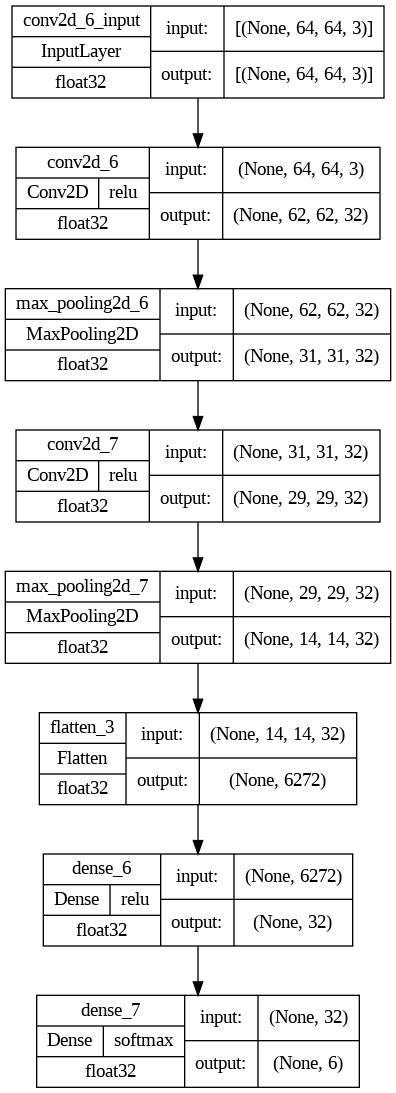

In [ ]:
# Visualize the model with show_shapes, show_dtype, and show_layer_activations options
plot_model(
    classifier,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


Fitting the CNN Model with Chess dataset

In [ ]:
# Calculate the number of batches based on your dataset size
num_train_samples = len(training_set.filenames)
num_test_samples = len(test_set.filenames)
batch_size = 32  # Adjust this value based on your machine's capacity

steps_per_epoch = num_train_samples // batch_size
validation_steps = num_test_samples // batch_size

history = classifier.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=test_set,
    validation_steps=validation_steps
)

Epoch 1/15
9/9 [==============================] - 1s 126ms/step - loss: 1.1334 - accuracy: 0.4857 - val_loss: 4.1498 - val_accuracy: 0.3750
Epoch 2/15
9/9 [==============================] - 1s 65ms/step - loss: 1.4165 - accuracy: 0.3889 - val_loss: 3.0829 - val_accuracy: 0.1250
Epoch 3/15
9/9 [==============================] - 1s 76ms/step - loss: 1.0210 - accuracy: 0.6389 - val_loss: 2.0110 - val_accuracy: 0.5000
Epoch 4/15
9/9 [==============================] - 1s 65ms/step - loss: 1.4078 - accuracy: 0.5833 - val_loss: 3.2878 - val_accuracy: 0.3750
Epoch 5/15
9/9 [==============================] - 1s 154ms/step - loss: 1.1926 - accuracy: 0.5278 - val_loss: 3.1966 - val_accuracy: 0.2500
Epoch 6/15
9/9 [==============================] - 0s 38ms/step - loss: 1.0566 - accuracy: 0.7500 - val_loss: 2.5197 - val_accuracy: 0.2500
Epoch 7/15
9/9 [==============================] - 1s 136ms/step - loss: 1.0403 - accuracy: 0.6389 - val_loss: 2.2206 - val_accuracy: 0.3750
Epoch 8/15
9/9 [========

Evaluating the Model

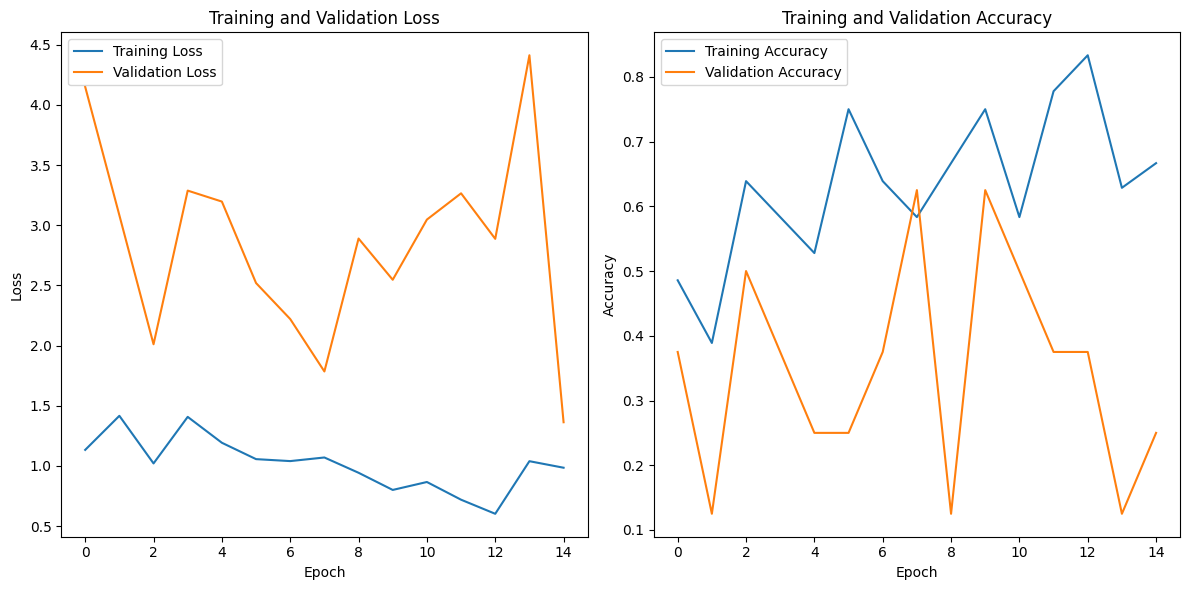

In [ ]:
# Create a DataFrame from the history object
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

Prediction using the Base Model

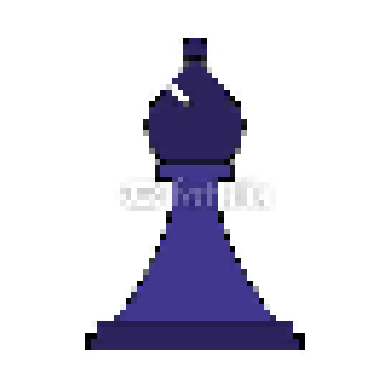

1/1 [==============================] - 0s 27ms/step
Predicted Probabilities: [[0.18682878 0.14727432 0.16887751 0.18407036 0.12274931 0.19019973]]
Predicted Class Index: 5
Predicted Class Label: Rook


In [ ]:
# Load and preprocess the image you want to make predictions on
img_path = '/content/drive/MyDrive/colabdataset/Chess/Test/Bishop/00000175.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
plt.imshow(img_array.astype('uint8'))  # Ensure data type is uint8 for display
plt.axis('off')  # Turn off axis labels
plt.show()
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
img_array /= 255.0  # Normalize the pixel values

# Make predictions
predictions = classifier.predict(img_array)

# Print the predicted class probabilities
print("Predicted Probabilities:", predictions)

# Get the predicted class index (class with the highest probability)
predicted_class_index = np.argmax(predictions, axis=1)[0]
print("Predicted Class Index:", predicted_class_index)

# Map the predicted class index to the class label
class_labels = ['King', 'Bishop', 'Knight', 'Pawn', 'Queen', 'Rook']
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class Label:", predicted_class_label)

####  Question No:2   (15 marks)

Improve the baseline model (model build in question2) performance and save the weights of improved model

Conditions to consider:

- Apply Data Augmentation if required

- No parameter limit

- Can use any number of layers

- Use any optimizers of your choice

- Use early stopping and save best model callbacks


Data Augumentation

In [ ]:
training_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

testing_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

testing_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 319 images belonging to 6 classes.
Found 82 images belonging to 6 classes.


In [ ]:
print("Training Set Shape:", training_data.image_shape)


Training Set Shape: (64, 64, 3)


In [ ]:
print("Training Set Shape:", testing_data.image_shape)

Training Set Shape: (64, 64, 3)


Building the CNN model by adding one more Convolution layer

In [ ]:
# Initialising the CNN
classifier1 = Sequential()

# Step 1 - Convolution
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier1.add(MaxPool2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier1.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier1.add(MaxPool2D(pool_size = (2, 2)))
#Adding a Third convolution
classifier1.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier1.add(MaxPool2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier1.add(Flatten())

# Step 4 - Full connection
classifier1.add(Dense(units = 128, activation = 'relu'))
classifier1.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 32)         

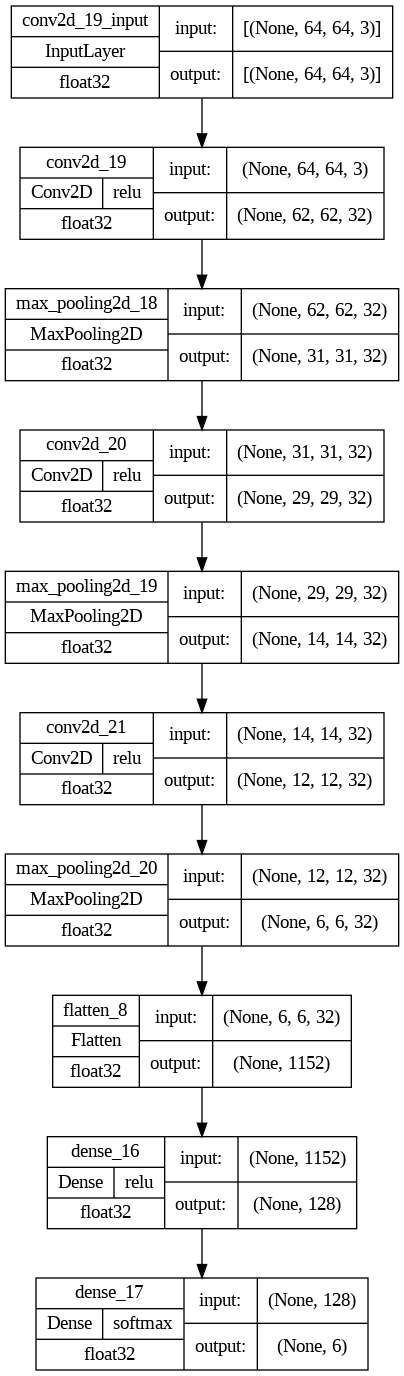

In [ ]:
# Visualize the model with show_shapes, show_dtype, and show_layer_activations options
plot_model(
    classifier1,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


Fitting the chess data to new model

In [ ]:
# Calculate the number of batches based on your dataset size
num_train_samples1 = len(training_data.filenames)
num_test_samples1 = len(testing_data.filenames)
batch_size = 32  # Adjust this value based on your machine's capacity
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

steps_per_epoch = num_train_samples1 // batch_size
validation_steps = num_test_samples1 // batch_size

history1 = classifier1.fit(
    training_data,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=testing_data,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

Epoch 1/15
9/9 [==============================] - 1s 60ms/step - loss: 1.3556 - accuracy: 0.3611 - val_loss: 2.6614 - val_accuracy: 0.3750
Epoch 2/15
9/9 [==============================] - 1s 127ms/step - loss: 1.3852 - accuracy: 0.4167 - val_loss: 1.8286 - val_accuracy: 0.3750
Epoch 3/15
9/9 [==============================] - 0s 55ms/step - loss: 1.3288 - accuracy: 0.4286 - val_loss: 3.0628 - val_accuracy: 0.2500
Epoch 4/15
9/9 [==============================] - 1s 63ms/step - loss: 1.3675 - accuracy: 0.2500 - val_loss: 2.7971 - val_accuracy: 0.0000e+00
Epoch 5/15
9/9 [==============================] - 0s 48ms/step - loss: 1.1591 - accuracy: 0.5556 - val_loss: 2.5379 - val_accuracy: 0.2500
Epoch 6/15
9/9 [==============================] - 1s 56ms/step - loss: 1.3983 - accuracy: 0.3611 - val_loss: 3.7603 - val_accuracy: 0.1250
Epoch 7/15
9/9 [==============================] - 0s 47ms/step - loss: 1.4042 - accuracy: 0.4444 - val_loss: 2.2520 - val_accuracy: 0.2500
Epoch 7: early stoppin

Evauating the optimized new CNN model

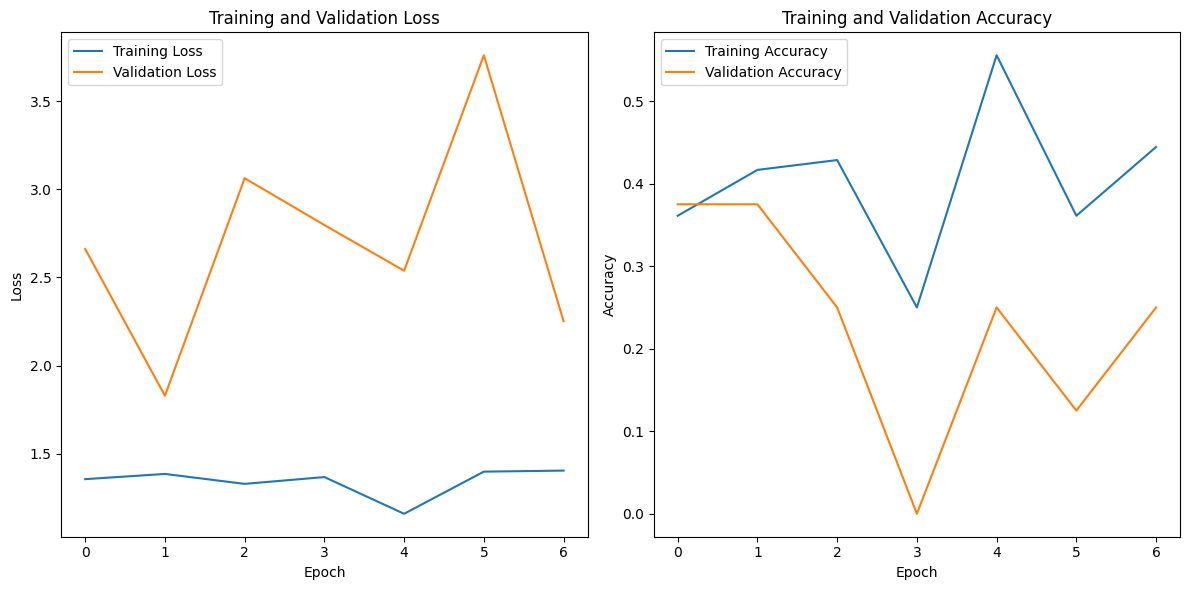

In [ ]:
# Create a DataFrame from the history object
history_df1 = pd.DataFrame(history1.history)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df1['loss'], label='Training Loss')
plt.plot(history_df1['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df1['accuracy'], label='Training Accuracy')
plt.plot(history_df1['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

Prediction using new optimized CNN model

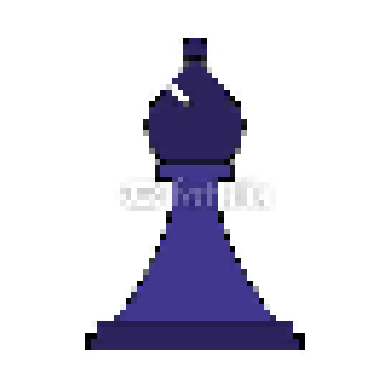

1/1 [==============================] - 0s 28ms/step
Predicted Probabilities: [[0.2493505  0.4024767  0.21925038 0.00177847 0.00266015 0.12448387]]
Predicted Class Index: 1
Predicted Class Label: Bishop


In [ ]:
# Load and preprocess the image you want to make predictions on
img_path = '/content/drive/MyDrive/colabdataset/Chess/Test/Bishop/00000175.jpg'
img1 = image.load_img(img_path, target_size=(64, 64))
img_array1 = image.img_to_array(img1)
plt.imshow(img_array1.astype('uint8'))  # Ensure data type is uint8 for display
plt.axis('off')  # Turn off axis labels
plt.show()
img_array1 = np.expand_dims(img_array1, axis=0)  # Add an extra dimension for batch size
img_array1 /= 255.0  # Normalize the pixel values

# Make predictions
predictions1 = classifier1.predict(img_array1)

# Print the predicted class probabilities
print("Predicted Probabilities:", predictions1)

# Get the predicted class index (class with the highest probability)
predicted_class_index1 = np.argmax(predictions1, axis=1)[0]
print("Predicted Class Index:", predicted_class_index1)

# Map the predicted class index to the class label
class_labels1 = ['King', 'Bishop', 'Knight', 'Pawn', 'Queen', 'Rook']
predicted_class_label1 = class_labels1[predicted_class_index1]
print("Predicted Class Label:", predicted_class_label1)

Save the model weights

In [ ]:
classifier1.save_weights('checkpoint_folder/')

In [ ]:
classifier1.save("saved_model/")

Load the saved model and evaluate

In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", input_dim=784))
model.add(Dense(256, activation="relu", name="second_hidden_layer"))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.load_weights('checkpoint_folder/')

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
model = model.load_model('saved_model/')

model.evaluate(testing_data, batch_size=32, verbose=2)